<a href="https://colab.research.google.com/github/aryangoyal7/CS101-Spring/blob/main/Hello_Foss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the `torch` library

In [1]:
import torch

Installing the `opendatasets` library, just a convient way of uploading my data on collab notebook

In [2]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/aneesh10/cricket-shot-dataset'

In [4]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aryanx07
Your Kaggle Key: ··········


100%|██████████| 645M/645M [00:12<00:00, 54.0MB/s]


In [5]:
data_dir = './cricket-shot-dataset/data'
import os

In [6]:
os.listdir(data_dir)

['pullshot', 'drive', 'legglance-flick', 'sweep']

#Import the Dataset Into PyTorch
Use the ImageFolder class from torchvision.

In [7]:
from torchvision.datasets import ImageFolder

In [8]:
dataset = ImageFolder(data_dir)

In [9]:
len(dataset)

4724

In [10]:
dataset[749]

(<PIL.Image.Image image mode=RGB size=268x188 at 0x7FD2DB4A37D0>, 0)

In [11]:
dataset.classes

['drive', 'legglance-flick', 'pullshot', 'sweep']

In [12]:
import torchvision.transforms as tt
normalize = tt.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2023, 0.1994, 0.2010],
)

dataset = ImageFolder(data_dir, tt.Compose([tt.Resize(64), 
                                            tt.RandomCrop(64), 
                                            tt.ToTensor()]))

review transformations once

In [13]:
dataset[84]

(tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0039,  ..., 0.0078, 0.0078, 0.0078],
          ...,
          [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
          [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039]],
 
         [[0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039,  ..., 0.0078, 0.0118, 0.0118],
          ...,
          [0.0039, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
          [0.0118, 0.0118, 0.0118,  ..., 0.0078, 0.0078, 0.0078],
          [0.0078, 0.0078, 0.0078,  ...,

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

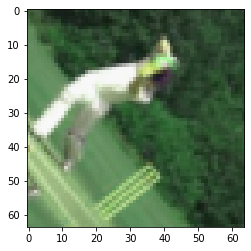

In [15]:
img, label = dataset[772]
plt.imshow(img.permute((1, 2, 0)))

In [16]:
val_pct = 0.1
val_size = int(val_pct * len(dataset))
train_size = len(dataset) - val_size

train_size, val_size

(4252, 472)

In [17]:
from torch.utils.data import random_split

train_ds, valid_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(valid_ds)

(4252, 472)

In [18]:
from torch.utils.data import DataLoader

batch_size = 128

train_dl = DataLoader(train_ds, 
                      batch_size, 
                      shuffle=True, 
                      num_workers=4, 
                      pin_memory=True)

valid_dl = DataLoader(valid_ds, 
                    batch_size, 
                    num_workers=4, 
                    pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [19]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

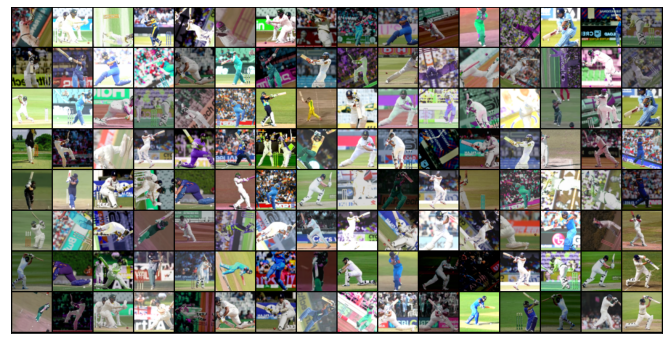

In [20]:
show_batch(valid_dl)

In [21]:
for cls in os.listdir(data_dir):
    print(cls, ':', len(os.listdir(data_dir + '/' + cls)))

pullshot : 1260
drive : 1224
legglance-flick : 1120
sweep : 1120


In [22]:
import torch

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [23]:
device = get_default_device()
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [24]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        "calculate loss for a batch of training data"
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        "calculate loss & accuracy for a batch of validation data"
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [25]:
@torch.no_grad()
def evaluate(model, val_loader):
    """Evaluates the model's performance on the validation set"""
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Model Starts

In [26]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # Input: 128 x 3 x 64 x 64
        self.conv1 = conv_block(in_channels, 64) # 128 x 64 x 64 x 64
        self.conv2 = conv_block(64, 128, pool=True) # 128 x 128 x 32 x 32
        self.res1 = nn.Sequential(conv_block(128, 128), # 128 x 128 x 32 x 32
                                  conv_block(128, 128)) # 128 x 128 x 32 x 32
        
        self.conv3 = conv_block(128, 256, pool=True) # 128 x 256 x 16 x 16
        self.conv4 = conv_block(256, 512, pool=True) # 128 x 512 x 8 x 8 
        self.res2 = nn.Sequential(conv_block(512, 512), # 128 x 512 x 8 x 8 
                                  conv_block(512, 512)) # 128 x 512 x 8 x 8 
        
        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), # 128 x 512 x 1 x 1 
                                        nn.Flatten(), # 128 x 512
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [32]:
for images, labels in train_dl:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor([1, 3, 1, 1, 1, 2, 3, 2, 3, 0, 3, 3, 3, 3, 3, 0, 2, 3, 1, 3, 2, 3, 1, 2,
        3, 1, 1, 2, 0, 3, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 0, 3, 1, 2, 1, 0, 3, 0,
        2, 0, 3, 2, 2, 1, 0, 3, 3, 2, 0, 0, 1, 2, 0, 0, 1, 0, 3, 0, 3, 3, 3, 2,
        3, 3, 0, 3, 2, 1, 0, 0, 2, 1, 1, 2, 3, 0, 1, 3, 1, 0, 0, 0, 2, 1, 0, 1,
        1, 2, 3, 0, 0, 1, 1, 0, 2, 2, 2, 3, 3, 2, 2, 2, 2, 0, 2, 3, 1, 1, 0, 1,
        3, 1, 1, 0, 2, 1, 3, 3], device='cuda:0')
torch.Size([128, 3, 64, 64])
tensor([[ 6.9349e-01,  1.9135e+00,  7.6805e-01, -2.6697e-01],
        [ 2.6989e+00,  2.7858e-01,  9.9755e-01,  1.2573e+00],
        [ 1.0687e+00,  1.2434e+00,  1.3021e+00, -3.4445e-02],
        [ 2.0154e+00,  1.2356e+00,  1.8657e+00, -1.8852e+00],
        [ 1.4482e+00,  2.0285e+00,  9.1560e-02, -8.8620e-01],
        [ 1.8822e+00,  5.9464e-01,  2.4271e+00, -7.2781e-01],
        [ 1.7989e-01, -6.4724e-01,  5.4358e-01,  3.5760e+00],
        [ 3.2508e+00,  1.3483e+00,  2.5387e+00, -2.8008e+00],
        [ 1.1187e+00,  8.

In [36]:
outputs.shape

torch.Size([128, 4])

In [27]:
model = to_device(ResNet9(3, len(dataset.classes)), device)
model


ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [28]:
history = [evaluate(model, valid_dl)]
history
history += fit(5, 0.001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 1.6863, val_loss: 1.5576, val_acc: 0.2884
Epoch [1], train_loss: 1.1676, val_loss: 1.1174, val_acc: 0.5211
Epoch [2], train_loss: 0.9927, val_loss: 0.8086, val_acc: 0.6886
Epoch [3], train_loss: 0.7960, val_loss: 0.6534, val_acc: 0.7599
Epoch [4], train_loss: 0.6447, val_loss: 0.6699, val_acc: 0.7237


In [29]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');
    plot_accuracies(history)

RecursionError: ignored

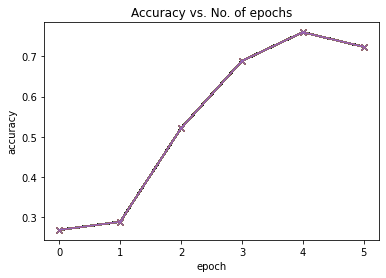

In [30]:
8plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
plot_losses(history)

In [ ]:
def predict_image(img, model, classes):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()]

In [ ]:
def show_image_prediction(img, label):
    plt.imshow(img.permute((1, 2, 0)))
    pred = predict_image(img, model, dataset.classes)
    print('Target:', dataset.classes[label])
    print('Prediction:', pred)

In [ ]:
show_image_prediction(*valid_ds[10])